
# pyspark1

In [ ]:
!pip install pyspark

"""
1- pyspark:  paralelrl processing over multiple cluster, focus on data logicrathe rthan data management
1- pyspark over iver python virtual machine(pvm) while spark run over java vitual machine(jvm), py4j bridge between pvm and jvm
"""

In [ ]:
import pyspark
import pandas as pd

from pyspark.sql import SparkSession # to make connection with spark
from pyspark.sql.functions import *
from pyspark.ml.functions import *

In [ ]:
pyspark.sql.types

<module 'pyspark.sql.types' from '/usr/local/lib/python3.12/dist-packages/pyspark/sql/types.py'>

In [ ]:
data=[("Adarsh",23 ),("chandrika",25),("abhi",26),("rahul",29)]

df=pd.DataFrame(data,columns=["Name","Age"])
df.to_csv("sample.csv"),df

(None,
         Name  Age
 0     Adarsh   23
 1  chandrika   25
 2       abhi   26
 3      rahul   29)

In [ ]:
spark = SparkSession.builder.appName("MySparkApp").getOrCreate()
spark


In [ ]:
df_spark = spark.read.option('header','true').csv("sample.csv",inferSchema=True) # header = true will take top row as header, inferSchema will help to determine df datatype, else each feature will be String
df_spark, type(df_spark) # type is  pysaprk datafrmae, rather than pandas.core.dataframe; df_spark1=spark.createDataFrame(df)

(DataFrame[_c0: int, Name: string, Age: int], pyspark.sql.dataframe.DataFrame)

In [ ]:
df_spark.show()

+---+---------+---+
|_c0|     Name|Age|
+---+---------+---+
|  0|   Adarsh| 23|
|  1|chandrika| 25|
|  2|     abhi| 26|
|  3|    rahul| 29|
+---+---------+---+



In [ ]:
df_spark.columns, df.columns

(['_c0', 'Name', 'Age'], Index(['Name', 'Age'], dtype='object'))

In [ ]:
df_spark.head(1), df.head(1)

([Row(_c0=0, Name='Adarsh', Age=23)],
      Name  Age
 0  Adarsh   23)

In [ ]:
df_spark.printSchema(), df.info()

root
 |-- _c0: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: string (nullable = true)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


(None, None)

In [ ]:
df_spark.show()

+---+---------+---+
|_c0|     Name|Age|
+---+---------+---+
|  0|   Adarsh| 23|
|  1|chandrika| 25|
|  2|     abhi| 26|
|  3|    rahul| 29|
+---+---------+---+



In [ ]:
df_spark.select(['name','age']).show()

+---------+---+
|     name|age|
+---------+---+
|   Adarsh| 23|
|chandrika| 25|
|     abhi| 26|
|    rahul| 29|
+---------+---+



In [ ]:
df_spark.dtypes, df.dtypes

([('_c0', 'int'), ('Name', 'string'), ('Age', 'int')],
 Name    object
 Age      int64
 dtype: object)

In [ ]:
# same as pandas dataframe
df_spark.describe().show()

+-------+------------------+------+------------------+
|summary|               _c0|  Name|               Age|
+-------+------------------+------+------------------+
|  count|                 4|     4|                 4|
|   mean|               1.5|  NULL|             25.75|
| stddev|1.2909944487358056|  NULL|2.4999999999999996|
|    min|                 0|Adarsh|                23|
|    max|                 3| rahul|                29|
+-------+------------------+------+------------------+



In [ ]:

df_spark.show()

+---+---------+---+
|_c0|     Name|Age|
+---+---------+---+
|  0|   Adarsh| 23|
|  1|chandrika| 25|
|  2|     abhi| 26|
|  3|    rahul| 29|
+---+---------+---+



In [ ]:
# adding new features
df_spark2=df_spark.withColumn('future_age',df_spark['age']+2)
df_spark2.show()

+---+---------+---+----------+
|_c0|     Name|Age|future_age|
+---+---------+---+----------+
|  0|   Adarsh| 23|        25|
|  1|chandrika| 25|        27|
|  2|     abhi| 26|        28|
|  3|    rahul| 29|        31|
+---+---------+---+----------+



In [ ]:
#  new feature based on cureent feature
df_spark2=df_spark2.withColumn('future_title', (when(df_spark2['future_age']>27,'senior').otherwise('junior')))
df_spark2.show()

+---+---------+---+----------+------------+
|_c0|     Name|Age|future_age|future_title|
+---+---------+---+----------+------------+
|  0|   Adarsh| 23|        25|      junior|
|  1|chandrika| 25|        27|      junior|
|  2|     abhi| 26|        28|      senior|
|  3|    rahul| 29|        31|      senior|
+---+---------+---+----------+------------+



In [ ]:
# drop the colun
df_spark2.drop('future_age').show()

+---+---------+---+------------+
|_c0|     Name|Age|future_title|
+---+---------+---+------------+
|  0|   Adarsh| 23|      junior|
|  1|chandrika| 25|      junior|
|  2|     abhi| 26|      senior|
|  3|    rahul| 29|      senior|
+---+---------+---+------------+



In [ ]:
# rename the column
df_spark2.withColumnRenamed('future_title','future_designation').show()

+---+---------+---+----------+------------------+
|_c0|     Name|Age|future_age|future_designation|
+---+---------+---+----------+------------------+
|  0|   Adarsh| 23|        25|            junior|
|  1|chandrika| 25|        27|            junior|
|  2|     abhi| 26|        28|            senior|
|  3|    rahul| 29|        31|            senior|
+---+---------+---+----------+------------------+



## Data enginerring:
collect store analyse and process large data ∇
.collect : will put data in list, .show: will show data

In [ ]:
# target: drop na values
df_spark3=df_spark2.withColumn('feature1', (when(df_spark2["future_age"]>25,lit(None).cast("string"))).otherwise('non null'))
df_spark3.show()

+---+---------+---+----------+------------+--------+
|_c0|     Name|Age|future_age|future_title|feature1|
+---+---------+---+----------+------------+--------+
|  0|   Adarsh| 23|        25|      junior|non null|
|  1|chandrika| 25|        27|      junior|    NULL|
|  2|     abhi| 26|        28|      senior|    NULL|
|  3|    rahul| 29|        31|      senior|    NULL|
+---+---------+---+----------+------------+--------+



In [ ]:
df_spark3.filter(df_spark3['feature1'].isNull()).show()

+---+---------+---+----------+------------+--------+
|_c0|     Name|Age|future_age|future_title|feature1|
+---+---------+---+----------+------------+--------+
|  1|chandrika| 25|        27|      junior|    NULL|
|  2|     abhi| 26|        28|      senior|    NULL|
|  3|    rahul| 29|        31|      senior|    NULL|
+---+---------+---+----------+------------+--------+



In [ ]:
# drop na values
df_spark3.na.drop(how='any').show()


+---+------+---+----------+------------+--------+
|_c0|  Name|Age|future_age|future_title|feature1|
+---+------+---+----------+------------+--------+
|  0|Adarsh| 23|        25|      junior|non null|
+---+------+---+----------+------------+--------+



In [ ]:
# drop na values when all is none
df_spark3.na.drop(how='all').show()


+---+---------+---+----------+------------+--------+
|_c0|     Name|Age|future_age|future_title|feature1|
+---+---------+---+----------+------------+--------+
|  0|   Adarsh| 23|        25|      junior|non null|
|  1|chandrika| 25|        27|      junior|    NULL|
|  2|     abhi| 26|        28|      senior|    NULL|
|  3|    rahul| 29|        31|      senior|    NULL|
+---+---------+---+----------+------------+--------+



In [ ]:
# drop na values when all is none, thresh says how many non nan values should be here
df_spark3.na.drop(how='any', thresh=6).show()


+---+------+---+----------+------------+--------+
|_c0|  Name|Age|future_age|future_title|feature1|
+---+------+---+----------+------------+--------+
|  0|Adarsh| 23|        25|      junior|non null|
+---+------+---+----------+------------+--------+



In [ ]:
# subset says remove null from given column only
df_spark3.na.drop(how='any', subset=['feature1']).show()


+---+------+---+----------+------------+--------+
|_c0|  Name|Age|future_age|future_title|feature1|
+---+------+---+----------+------------+--------+
|  0|Adarsh| 23|        25|      junior|non null|
+---+------+---+----------+------------+--------+



In [ ]:
# subset says remove null from given column only
df_spark3.na.fill('miss_val',['feature1']).show()


+---+---------+---+----------+------------+--------+
|_c0|     Name|Age|future_age|future_title|feature1|
+---+---------+---+----------+------------+--------+
|  0|   Adarsh| 23|        25|      junior|non null|
|  1|chandrika| 25|        27|      junior|miss_val|
|  2|     abhi| 26|        28|      senior|miss_val|
|  3|    rahul| 29|        31|      senior|miss_val|
+---+---------+---+----------+------------+--------+



In [ ]:
from pyspark.ml.feature import Imputer
impute=Imputer(
    inputCols=['future_age'],
    outputCols=["{}_imputed".format(c) for c in ['future_age']]
).setStrategy("mode")
impute.fit(df_spark3).transform(df_spark3).show()

+---+---------+---+----------+------------+--------+------------------+
|_c0|     Name|Age|future_age|future_title|feature1|future_age_imputed|
+---+---------+---+----------+------------+--------+------------------+
|  0|   Adarsh| 23|        25|      junior|non null|                25|
|  1|chandrika| 25|        27|      junior|    NULL|                27|
|  2|     abhi| 26|        28|      senior|    NULL|                28|
|  3|    rahul| 29|        31|      senior|    NULL|                31|
+---+---------+---+----------+------------+--------+------------------+



In [ ]:
df_spark3.select(avg("age")).collect()[0][0]

25.75

## fileter operation

In [ ]:
df_spark3.filter("age<27").collect() # it will ouput in []


# method 1
df_spark3.filter("age<27").show()
# method 2
df_spark3.filter(df_spark3["age"]<27).show()

+---+---------+---+----------+------------+--------+
|_c0|     Name|Age|future_age|future_title|feature1|
+---+---------+---+----------+------------+--------+
|  0|   Adarsh| 23|        25|      junior|non null|
|  1|chandrika| 25|        27|      junior|    NULL|
|  2|     abhi| 26|        28|      senior|    NULL|
+---+---------+---+----------+------------+--------+



In [ ]:
df_spark3.filter("age<27").select(["age", "name"]).show()

+---+---------+
|age|     name|
+---+---------+
| 23|   Adarsh|
| 25|chandrika|
| 26|     abhi|
+---+---------+



In [ ]:
df_spark3.select(df_spark3["age"]<27).show()

+----------+
|(age < 27)|
+----------+
|      true|
|      true|
|      true|
|     false|
+----------+



In [ ]:
# looking for some who is senior and age and age is less 29
df_spark3.filter((df_spark3["age"]<29) & (df_spark3["future_title"]!="junior")).show()

+---+----+---+----------+------------+--------+
|_c0|Name|Age|future_age|future_title|feature1|
+---+----+---+----------+------------+--------+
|  2|abhi| 26|        28|      senior|    NULL|
+---+----+---+----------+------------+--------+



In [ ]:
# not paramaeter
df_spark3.filter(~ (df_spark3["age"]<29) & (df_spark3["future_title"]!="junior")).show()

+---+-----+---+----------+------------+--------+
|_c0| Name|Age|future_age|future_title|feature1|
+---+-----+---+----------+------------+--------+
|  3|rahul| 29|        31|      senior|    NULL|
+---+-----+---+----------+------------+--------+



## agg

In [ ]:
df_spark3.show()

+---+---------+---+----------+------------+--------+
|_c0|     Name|Age|future_age|future_title|feature1|
+---+---------+---+----------+------------+--------+
|  0|   Adarsh| 23|        25|      junior|non null|
|  1|chandrika| 25|        27|      junior|    NULL|
|  2|     abhi| 26|        28|      senior|    NULL|
|  3|    rahul| 29|        31|      senior|    NULL|
+---+---------+---+----------+------------+--------+



In [ ]:
df_spark3.groupBy("future_title").sum().show()

+------------+--------+--------+---------------+
|future_title|sum(_c0)|sum(Age)|sum(future_age)|
+------------+--------+--------+---------------+
|      junior|       1|      48|             52|
|      senior|       5|      55|             59|
+------------+--------+--------+---------------+



In [ ]:
df

,Name,Age
0,Adarsh,23
1,chandrika,25
2,abhi,26
3,rahul,29


In [ ]:
def func(x):
  x+=100
  return x
df["age"]=df.["Age"].apply(lambda x: func(x))
df

,Name,Age,age
0,Adarsh,23,123
1,chandrika,25,125
2,abhi,26,126
3,rahul,29,129


In [ ]:
def func(x):
  print(x["age"].values[0],"---")
  return x
df.groupby(["Age"]).min()


,Name,age
Age,,
23,Adarsh,123
25,chandrika,125
26,abhi,126
29,rahul,129


In [ ]:
df_spark3.show()

+---+---------+---+----------+------------+--------+
|_c0|     Name|Age|future_age|future_title|feature1|
+---+---------+---+----------+------------+--------+
|  0|   Adarsh| 23|        25|      junior|non null|
|  1|chandrika| 25|        27|      junior|    NULL|
|  2|     abhi| 26|        28|      senior|    NULL|
|  3|    rahul| 29|        31|      senior|    NULL|
+---+---------+---+----------+------------+--------+



In [ ]:
# max age of junior
df_spark3.select(['future_title','future_age']).groupBy(["future_title"]).max().show()

+------------+---------------+
|future_title|max(future_age)|
+------------+---------------+
|      junior|             27|
|      senior|             31|
+------------+---------------+



# covid 19 dug proediction
pyaprk put data in distributed places, rather than pandas put it all data over ram, but pyspark put on ram _disk, so .loc is not allowed in spark

In [ ]:
# https://www.kaggle.com/code/yeonseokcho/covid-19-drug-discovery

from rdkit.Chem import Draw
from rdkit import Chem
import kagglehub
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.functions import udf
from pyspark.sql.types import *

spark = SparkSession.builder.appName("covid19MoleculePrediction").getOrCreate()

In [ ]:

path=kagglehub.dataset_download("divyansh22/drug-discovery-data")

path=kagglehub.dataset_download("divyansh22/drug-discovery-data")
print(path)

Using Colab cache for faster access to the 'drug-discovery-data' dataset.
Using Colab cache for faster access to the 'drug-discovery-data' dataset.
/kaggle/input/drug-discovery-data


In [ ]:
properties=r"/kaggle/input/drug-discovery-data/DDH Data with Properties.csv"
data=r"/kaggle/input/drug-discovery-data/DDH Data.csv"


"""
Feature:
Pred: higher pIC50, higher potency  using physical, chemical, and structural properties.
High Potency:	You need only a small amount of the drug to get the desired effect.
Low Potency:	You need a large amount of the drug to get the same effect.

For example, if Drug A requires 10 mg to relieve a headache, and Drug B requires 200 mg to relieve the same headache, Drug A is more potent than Drug B.

Identifiers
CID	Identifier	Unique identification number for the compound in the PubChem database.
SMILES	Identifier	A linear text notation representing the molecule's chemical structure.
InChI	Identifier	A standard text identifier used to encode a molecule's structure.
InChIKey	Identifier	A fixed-length hashed version of the InChI, used for internet searches.
IUPACName	Identifier	The systematic, formal chemical name of the compound.

Structural Features
MolecularFormula	Structural	Specifies the number of atoms of each elemental type in the molecule.
HeavyAtomCount	Structural	The total number of non-hydrogen atoms in the molecule.
RotatableBondCount	Structural	The number of bonds that allow free rotation, indicating molecular flexibility.
AtomStereoCount	Structural	Total number of atoms that are chiral (exist in left- and right-handed forms).
DefinedAtomStereoCount	Structural	Count of chiral atoms where the 3D configuration is known and specified.
UndefinedAtomStereoCount	Structural	Count of chiral atoms where the 3D configuration is not yet specified.
BondStereoCount	Structural	Total number of double bonds that can exist as E/Z isomers.
DefinedBondStereoCount	Structural	Count of double bonds with a known and specified E/Z configuration.
UndefinedBondStereoCount	Structural	Count of double bonds where the E/Z configuration is not specified.
CovalentUnitCount	Structural	The number of discrete covalently bonded units (e.g., one for a single molecule).
FeatureRingCount3D	Structural	The number of rings in the molecule's 3D structure.
ConformerCount3D	Structural	The number of different low-energy 3D shapes (conformers) generated for the molecule.
EffectiveRotorCount3D	Structural	A measure of effective flexibility, related to rotatable bonds.

Physicochemical Features
MolecularWeight	Physical	The average mass of a molecule, calculated from the atomic weights of all atoms.
ExactMass	Physical	The mass of a molecule using the exact mass of the most abundant isotope for each atom.
MonoisotopicMass	Physical	The mass of a molecule using the exact mass of the lowest mass isotope for each atom.
XLogP	Chemical	A calculated value representing the molecule's lipophilicity (affinity for fat-like environments).
TPSA	Chemical	Topological Polar Surface Area, indicating the area of the molecule available for hydrogen bonding.
Complexity	Chemical	An index quantifying the structural diversity and complexity of the molecule.
Charge	Chemical	The formal electronic charge of the molecule.
HBondDonorCount	Chemical	The number of atoms that can donate a hydrogen atom to a hydrogen bond.
HBondAcceptorCount	Chemical	The number of atoms that can accept a hydrogen atom in a hydrogen bond.
IsotopeAtomCount	Physical	The count of atoms that are specifically isotopes.
Volume3D	Physical	The calculated 3D volume of the molecule.
XStericQuadrupole3D	Physical	A component of the 3D spatial distribution of atoms (steric bulk).
YStericQuadrupole3D	Physical	A component of the 3D spatial distribution of atoms (steric bulk).
ZStericQuadrupole3D	Physical	A component of the 3D spatial distribution of atoms (steric bulk).

FeatureCount3D	Chemical	Total count of 3D features (e.g., donors, acceptors, rings) on the molecule.
FeatureAcceptorCount3D	Chemical	Count of 3D features capable of accepting a hydrogen bond.
FeatureDonorCount3D	Chemical	Count of 3D features capable of donating a hydrogen bond.
FeatureAnionCount3D	Chemical	Count of 3D features with a negative charge (anionic centers).
FeatureCationCount3D	Chemical	Count of 3D features with a positive charge (cationic centers).
FeatureHydrophobeCount3D	Chemical	Count of 3D features that are water-repelling (hydrophobic patches).
ConformerModelRMSD3D	Physical	A measure of the structural deviation (root mean square deviation) between different conformers.

Target Variable
pIC50	Target	The negative logarithm of the Half Maximal Inhibitory Concentration (IC 50 ), a measure of drug potency.
higher pIC50, higher potency  using physical, chemical, and structural properties.

""";

In [ ]:
properties_df = spark.read.csv(
    properties,
    header=True,       # Treat the first row as column names
    inferSchema=True )
properties_df.show(1)

+-------+--------------------+----------------+---------------+--------------------+--------------------+--------------------+-----+----------+----------------+-----+----------+------+---------------+------------------+------------------+--------------+----------------+---------------+----------------------+------------------------+---------------+----------------------+------------------------+-----------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+
|    CID|              SMILES|MolecularFormula|MolecularWeight|               InChI|            InChIKey|           IUPACName|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|Charge|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|HeavyAtomCount|IsotopeAtomCount|AtomStereoCount|DefinedAtomS

In [ ]:
properties_df.columns

['CID',
 'SMILES',
 'MolecularFormula',
 'MolecularWeight',
 'InChI',
 'InChIKey',
 'IUPACName',
 'XLogP',
 'ExactMass',
 'MonoisotopicMass',
 'TPSA',
 'Complexity',
 'Charge',
 'HBondDonorCount',
 'HBondAcceptorCount',
 'RotatableBondCount',
 'HeavyAtomCount',
 'IsotopeAtomCount',
 'AtomStereoCount',
 'DefinedAtomStereoCount',
 'UndefinedAtomStereoCount',
 'BondStereoCount',
 'DefinedBondStereoCount',
 'UndefinedBondStereoCount',
 'CovalentUnitCount',
 'Volume3D',
 'XStericQuadrupole3D',
 'YStericQuadrupole3D',
 'ZStericQuadrupole3D',
 'FeatureCount3D',
 'FeatureAcceptorCount3D',
 'FeatureDonorCount3D',
 'FeatureAnionCount3D',
 'FeatureCationCount3D',
 'FeatureRingCount3D',
 'FeatureHydrophobeCount3D',
 'ConformerModelRMSD3D',
 'EffectiveRotorCount3D',
 'ConformerCount3D',
 'pIC50']

In [ ]:
data_df = spark.read.csv(
    data,
    header=True,       # Treat the first row as column names
    inferSchema=True )
data_df.show(1)

+------------+--------------------+----------------------+----+
|Compound No.|              SMILES|pIC50 (IC50 in microM)| _c3|
+------------+--------------------+----------------------+----+
|           1|ClC1=CC(NC(=O)CSC...|          -0.477121255|NULL|
+------------+--------------------+----------------------+----+
only showing top 1 row



## joining data

In [ ]:
df1=data_df.join(properties_df, on='SMILES', how='inner')
df1=df1.drop("Compound No.").drop("_c3")
df1.show()

+--------------------+----------------------+---------+----------------+---------------+--------------------+--------------------+--------------------+-----+----------+----------------+-----+----------+------+---------------+------------------+------------------+--------------+----------------+---------------+----------------------+------------------------+---------------+----------------------+------------------------+-----------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+
|              SMILES|pIC50 (IC50 in microM)|      CID|MolecularFormula|MolecularWeight|               InChI|            InChIKey|           IUPACName|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|Charge|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|HeavyAtomC

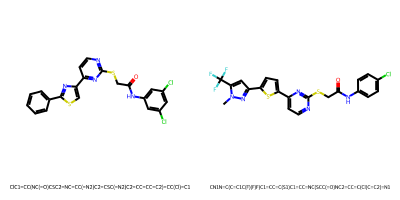

In [ ]:
smiles_str=[i["Smiles"] for i in df1.select("Smiles").collect()]
mol_smiles=[Chem.MolFromSmiles(i) for i in smiles_str]
print(mol_smiles[0])
n=2
Draw.MolsToGridImage(mol_smiles[:n], legends=smiles_str[:n],useSVG=True,molsPerRow=2)


In [ ]:
df1.show()

+--------------------+----------------------+---------+----------------+---------------+--------------------+--------------------+--------------------+-----+----------+----------------+-----+----------+------+---------------+------------------+------------------+--------------+----------------+---------------+----------------------+------------------------+---------------+----------------------+------------------------+-----------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+
|              SMILES|pIC50 (IC50 in microM)|      CID|MolecularFormula|MolecularWeight|               InChI|            InChIKey|           IUPACName|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|Charge|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|HeavyAtomC

In [ ]:
df1.schema

StructType([StructField('SMILES', StringType(), True), StructField('pIC50 (IC50 in microM)', StringType(), True), StructField('CID', IntegerType(), True), StructField('MolecularFormula', StringType(), True), StructField('MolecularWeight', DoubleType(), True), StructField('InChI', StringType(), True), StructField('InChIKey', StringType(), True), StructField('IUPACName', StringType(), True), StructField('XLogP', DoubleType(), True), StructField('ExactMass', DoubleType(), True), StructField('MonoisotopicMass', DoubleType(), True), StructField('TPSA', DoubleType(), True), StructField('Complexity', DoubleType(), True), StructField('Charge', DoubleType(), True), StructField('HBondDonorCount', DoubleType(), True), StructField('HBondAcceptorCount', DoubleType(), True), StructField('RotatableBondCount', DoubleType(), True), StructField('HeavyAtomCount', DoubleType(), True), StructField('IsotopeAtomCount', DoubleType(), True), StructField('AtomStereoCount', DoubleType(), True), StructField('Defi

In [ ]:
df1.count() # same as shape in python

104

In [ ]:
col("SMILES") # it will return only object rather than data

Column<'SMILES'>

In [ ]:
# pic50 is  present with string, need to cast it into double actual format
df1=df1.withColumn("target_pIC50", df1["pIC50"].cast("double"))
df1.show(2)

+--------------------+----------------------+-------+----------------+---------------+--------------------+--------------------+--------------------+-----+----------+----------------+-----+----------+------+---------------+------------------+------------------+--------------+----------------+---------------+----------------------+------------------------+---------------+----------------------+------------------------+-----------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+------------+
|              SMILES|pIC50 (IC50 in microM)|    CID|MolecularFormula|MolecularWeight|               InChI|            InChIKey|           IUPACName|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|Charge|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|H

In [ ]:
# getting know how many nulls in a colum; col() to get columns of df, it will go row wise
bool1=[sum(when(col(i).isNull(),1).otherwise(0))  for i in df1.columns]
df1.select(bool1).show()

+-------------------------------------------------+-----------------------------------------------------------------+----------------------------------------------+-----------------------------------------------------------+----------------------------------------------------------+------------------------------------------------+---------------------------------------------------+----------------------------------------------------+------------------------------------------------+----------------------------------------------------+-----------------------------------------------------------+-----------------------------------------------+-----------------------------------------------------+-------------------------------------------------+----------------------------------------------------------+-------------------------------------------------------------+-------------------------------------------------------------+---------------------------------------------------------+--------

In [ ]:
df1.filter(col("target_pIC50").isNull()).show()

+--------------------+----------------------+---------+----------------+---------------+--------------------+--------------------+--------------------+-----+----------+----------------+-----+----------+------+---------------+------------------+------------------+--------------+----------------+---------------+----------------------+------------------------+---------------+----------------------+------------------------+-----------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+-------+------------+
|              SMILES|pIC50 (IC50 in microM)|      CID|MolecularFormula|MolecularWeight|               InChI|            InChIKey|           IUPACName|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|Charge|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|He

In [ ]:
# getting smiles for which iupac is null
df1.select(["SMILES"]).filter(col("IUPACName").isNull()).show()

+--------------------+
|              SMILES|
+--------------------+
|O=C1N(CC2=CC=C3C=...|
|O=C1N(CC2=CC=C3C=...|
|CC1CC(C)CN(C1)S(=...|
+--------------------+



In [ ]:
# # getting more respective smiles for which iupac is null
out=[ col(i).isNull() for i in df1.columns]
df1.filter(col("IUPACName").isNull()).show()

+--------------------+----------------------+---+----------------+---------------+-----+--------+---------+-----+---------+----------------+----+----------+------+---------------+------------------+------------------+--------------+----------------+---------------+----------------------+------------------------+---------------+----------------------+------------------------+-----------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+------------+
|              SMILES|pIC50 (IC50 in microM)|CID|MolecularFormula|MolecularWeight|InChI|InChIKey|IUPACName|XLogP|ExactMass|MonoisotopicMass|TPSA|Complexity|Charge|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|HeavyAtomCount|IsotopeAtomCount|AtomStereoCount|DefinedAtomStereoCount|UndefinedAtomStere

## drop columns


In [ ]:
print(df1.count(), len(df1.columns))
df1=df1.dropna(how='any')
print(df1.count(), len(df1.columns))

104 42
91 42


In [ ]:
filt1=[sum(when(col(i).isNull(),1).otherwise(0)) for i in df1.columns]
df1.select(filt1).show()

+-------------------------------------------------+-----------------------------------------------------------------+----------------------------------------------+-----------------------------------------------------------+----------------------------------------------------------+------------------------------------------------+---------------------------------------------------+----------------------------------------------------+------------------------------------------------+----------------------------------------------------+-----------------------------------------------------------+-----------------------------------------------+-----------------------------------------------------+-------------------------------------------------+----------------------------------------------------------+-------------------------------------------------------------+-------------------------------------------------------------+---------------------------------------------------------+--------

In [ ]:
# group by smiles and molecular formula
df_grp=df1.groupBy(["SMILES","MolecularFormula"]).agg(count("target_pIC50").alias("count"))
df_grp.show()

+--------------------+----------------+-----+
|              SMILES|MolecularFormula|count|
+--------------------+----------------+-----+
|ClC(Cl)=C(Cl)C(=O...|     C18H8Cl6O6S|    1|
|ClC1=CC(NC(=O)CSC...|  C21H14Cl2N4OS2|    1|
|CC(SC1=NC(C2=CC=C...|   C20H15ClN4O2S|    1|
|O=C1NC2=C(C=C(C=C...|     C12H12N2O5S|    1|
|IC1=CC=C2N(CC3=CC...|    C19H17IN2O3S|    1|
|CC1=CC(=O)NC(SCC(...|   C19H16ClN3O3S|    1|
|CC1CCN(CC1)S(=O)(...|     C25H24N2O4S|    1|
|FC1=CC(Cl)=C(CN2C...|    C15H8ClFINO2|    1|
|FC(F)(F)C1=NN=C(N...|    C16H8F3N3O2S|    1|
|ClC1=CC=C(NC(=O)C...|  C20H12ClIN2O3S|    1|
|CC(=O)C1=CC=CC=C1...|       C15H12O5S|    1|
|ClC1=CC(CN2CCN(CC...|   C19H18ClN3O4S|    1|
|CN1C(=O)C(=O)C2=C...|     C13H14N2O5S|    1|
|CC1COC2=C1C(=O)C(...|        C18H14O3|    1|
|ClC1=CC(OC(=O)C2=...|     C11H7ClN2O2|    1|
|CCOC1=CC=C(C=C1)N...|     C18H19N3O3S|    1|
|CC1=C(CN2C(=O)C(=...|      C15H11N3O3|    1|
|CC1(C)CC2=C(SC(NC...|     C16H16N2O2S|    1|
|CC1CCN(CC1)S(=O)(...|     C21H22N

In [ ]:
df_grp.filter(col("count")==0).show()

+------+----------------+-----+
|SMILES|MolecularFormula|count|
+------+----------------+-----+
+------+----------------+-----+



In [ ]:
# use .collect same as .iloc in pandas
df1.filter(df1["MolecularFormula"]=="C20H15N5O5S").select(["smiles","MolecularFormula","target_pIC50","pIC50"]).show()

+------+----------------+------------+-----+
|smiles|MolecularFormula|target_pIC50|pIC50|
+------+----------------+------------+-----+
+------+----------------+------------+-----+



In [ ]:
alpha_features=[i[0] for i in df1.dtypes if i[1]=="string"]
df1.select(alpha_features).show(1)

+--------------------+----------------------+----------------+--------------------+--------------------+--------------------+------------+
|              SMILES|pIC50 (IC50 in microM)|MolecularFormula|               InChI|            InChIKey|           IUPACName|       pIC50|
+--------------------+----------------------+----------------+--------------------+--------------------+--------------------+------------+
|ClC1=CC(NC(=O)CSC...|          -0.477121255|  C21H14Cl2N4OS2|InChI=1S/C21H14Cl...|LILOEJREEQFTPM-UH...|N-(3,5-dichloroph...|-0.477121255|
+--------------------+----------------------+----------------+--------------------+--------------------+--------------------+------------+
only showing top 1 row



In [ ]:
target_var=df1.select(["target_pIC50"])
target_var.show()

+------------+
|target_pIC50|
+------------+
|-0.477121255|
|        -1.0|
|-1.041392685|
|-1.146128036|
|-1.176091259|
|-1.176091259|
|-1.176091259|
|-1.477121255|
|-1.602059991|
|-1.602059991|
|-1.653212514|
| -1.77815125|
| -1.77815125|
|        -2.0|
|-2.301029996|
|-2.301029996|
|-2.301029996|
|-2.301029996|
|-2.301029996|
|-2.397940009|
+------------+
only showing top 20 rows



In [ ]:
alpha_features.extend([]) #target_pIC50, "CID": we will use  while meging pred with smiles for visyaliztion
print(alpha_features)

df3=df1.drop(*alpha_features)
df3.show(1)

['SMILES', 'pIC50 (IC50 in microM)', 'MolecularFormula', 'InChI', 'InChIKey', 'IUPACName', 'pIC50']
+-------+---------------+-----+----------+----------------+-----+----------+------+---------------+------------------+------------------+--------------+----------------+---------------+----------------------+------------------------+---------------+----------------------+------------------------+-----------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+
|    CID|MolecularWeight|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|Charge|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|HeavyAtomCount|IsotopeAtomCount|AtomStereoCount|DefinedAtomStereoCount|UndefinedAtomStereoCount|BondStereoCount|DefinedBondStereoCount|UndefinedBondStereoCount|Co

In [ ]:
target_var.count(), df3.count()

(91, 91)

In [ ]:
df3.show(2)

+-------+---------------+-----+----------+----------------+-----+----------+------+---------------+------------------+------------------+--------------+----------------+---------------+----------------------+------------------------+---------------+----------------------+------------------------+-----------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+
|    CID|MolecularWeight|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|Charge|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|HeavyAtomCount|IsotopeAtomCount|AtomStereoCount|DefinedAtomStereoCount|UndefinedAtomStereoCount|BondStereoCount|DefinedBondStereoCount|UndefinedBondStereoCount|CovalentUnitCount|Volume3D|XStericQuadrupole3D|YStericQuadrupole3D|ZStericQuadrupole3D|FeatureCount3D|

## data visulaiztion

In [ ]:
df3.show()

+---------+---------------+-----+----------+----------------+-----+----------+------+---------------+------------------+------------------+--------------+----------------+---------------+----------------------+------------------------+---------------+----------------------+------------------------+-----------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+
|      CID|MolecularWeight|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|Charge|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|HeavyAtomCount|IsotopeAtomCount|AtomStereoCount|DefinedAtomStereoCount|UndefinedAtomStereoCount|BondStereoCount|DefinedBondStereoCount|UndefinedBondStereoCount|CovalentUnitCount|Volume3D|XStericQuadrupole3D|YStericQuadrupole3D|ZStericQuadrupole3D|FeatureCoun

In [ ]:
df3.describe().show()


+-------+--------------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------+------------------+------------------+------------------+------------------+----------------+-------------------+----------------------+------------------------+-------------------+----------------------+------------------------+-----------------+------------------+-------------------+-------------------+-------------------+------------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+-----------------+-------------------+
|summary|                 CID|  MolecularWeight|             XLogP|         ExactMass| MonoisotopicMass|             TPSA|        Complexity|Charge|   HBondDonorCount|HBondAcceptorCount|RotatableBondCount|    HeavyAtomCount|IsotopeAtomCount|    AtomStereoCount|DefinedAtomStereoCount|UndefinedAtom

In [ ]:
# us of *: take the items from an iterable (like a list) and pass them as individual, separate arguments to a function.

# deviation is zero, remove those features
df3=df3.drop(*["Charge","IsotopeAtomCount","DefinedAtomStereoCount","UndefinedBondStereoCount","CovalentUnitCount"])

In [ ]:
df3.corr("ExactMass","MolecularWeight")

0.9999921632247717

<Axes: >

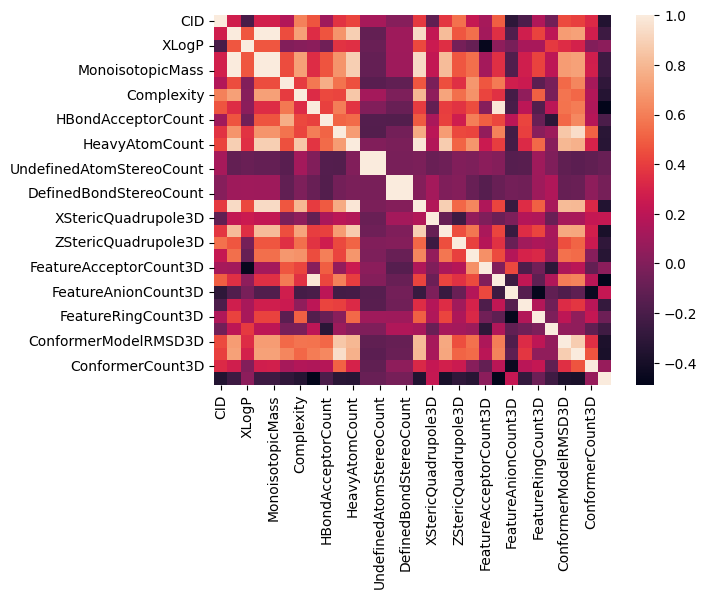

In [ ]:
# import pyspark.pandas as ps
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df3.toPandas().corr())

In [ ]:
sns.pairplot(df3.toPandas().corr())

## min max

In [ ]:
df3.show(2)

+-------+---------------+-----+----------+----------------+-----+----------+---------------+------------------+------------------+--------------+---------------+------------------------+---------------+----------------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+
|    CID|MolecularWeight|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|HeavyAtomCount|AtomStereoCount|UndefinedAtomStereoCount|BondStereoCount|DefinedBondStereoCount|Volume3D|XStericQuadrupole3D|YStericQuadrupole3D|ZStericQuadrupole3D|FeatureCount3D|FeatureAcceptorCount3D|FeatureDonorCount3D|FeatureAnionCount3D|FeatureCationCount3D|FeatureRingCount3D|FeatureHydrophobeCount3D|ConformerModelRMSD3D|EffectiveRotorCount3D|Conformer

In [ ]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import *
from pyspark.ml.regression import *


"""
If you had 100 separate numeric columns, Spark could not easily optimize the memory storage for all those zeros across 100 columns
simultaneously; packing them into a single, compact vector column is much more efficient.
"""
# if we want to do minmax scaling, then we need to convert those set of features in vectors,
assembler = VectorAssembler(
    inputCols=["MolecularWeight","MonoisotopicMass","Complexity"],
    outputCol="features_vector"
)
df_vector = assembler.transform(df3)
df_vector.select("features_vector").show(truncate=False) # output will concate all features in one vect, easy to process and fast

+------------------------+
|features_vector         |
+------------------------+
|[473.4,471.998609,559.0]|
|[510.0,509.035865,670.0]|
|[519.1,518.013024,627.0]|
|[460.0,459.004901,554.0]|
|[422.9,422.060425,529.0]|
|[525.3,524.008837,687.0]|
|[457.3,456.021452,567.0]|
|[356.3,355.031289,354.0]|
|[471.5,471.067111,955.0]|
|[369.5,369.096955,427.0]|
|[397.4,397.109627,631.0]|
|[434.5,434.104876,836.0]|
|[462.5,462.136176,890.0]|
|[401.9,401.06009,619.0] |
|[401.9,401.06009,609.0] |
|[511.1,510.095096,638.0]|
|[403.4,403.081362,613.0]|
|[438.6,438.208947,776.0]|
|[430.4,430.071131,794.0]|
|[377.4,377.07939,509.0] |
+------------------------+
only showing top 20 rows



In [ ]:
scaler = MinMaxScaler(
    inputCol="features_vector",
    outputCol="scaled_features_vector"
)

scaler_model = scaler.fit(df_vector).transform(df_vector)
scaler_model.select("scaled_features_vector").show(truncate=False)

+-------------------------------------------------------------+
|scaled_features_vector                                       |
+-------------------------------------------------------------+
|[0.7402891976183724,0.7432354647231249,0.4415041782729805]   |
|[0.8440601077402892,0.8491138333104588,0.596100278551532]    |
|[0.8698610717323505,0.8747768292264928,0.5362116991643454]   |
|[0.7022965693223703,0.7060903639915752,0.43454038997214484]  |
|[0.5971080238162744,0.600477225502214,0.3997214484679666]    |
|[0.8874397504961722,0.8919170541609407,0.6197771587743732]   |
|[0.6946413382478026,0.6975615811658844,0.45264623955431754]  |
|[0.40827899064360645,0.40886109801429904,0.15598885793871867]|
|[0.7349021831584917,0.7405725922743028,0.9930362116991643]   |
|[0.445704564785937,0.4490706040634062,0.2576601671309192]    |
|[0.5248086192231357,0.5291504029322018,0.541782729805014]    |
|[0.6299971647292316,0.6349086861484909,0.8272980501392758]   |
|[0.7093847462432662,0.7150417368632128,

In [ ]:
scaler_model.show()

+---------+---------------+-----+----------+----------------+-----+----------+---------------+------------------+------------------+--------------+---------------+------------------------+---------------+----------------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+--------------------+----------------------+
|      CID|MolecularWeight|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|HeavyAtomCount|AtomStereoCount|UndefinedAtomStereoCount|BondStereoCount|DefinedBondStereoCount|Volume3D|XStericQuadrupole3D|YStericQuadrupole3D|ZStericQuadrupole3D|FeatureCount3D|FeatureAcceptorCount3D|FeatureDonorCount3D|FeatureAnionCount3D|FeatureCationCount3D|FeatureRingCount3D|FeatureHydrophobeCount3D|Conf

In [ ]:
train, test=scaler_model.randomSplit([0.7,0.3], seed=9)
train.count(), test.count()

(64, 27)

In [ ]:
res=LinearRegression(featuresCol="scaled_features_vector",labelCol="target_pIC50",predictionCol="model_prediction")
reslr_model=res.fit(train)
reslr_model


LinearRegressionModel: uid=LinearRegression_0da849818982, numFeatures=3

In [ ]:
LRpred=reslr_model.transform(test)
LRpred.show()

+--------+---------------+-----+----------+----------------+-----+----------+---------------+------------------+------------------+--------------+---------------+------------------------+---------------+----------------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+--------------------+----------------------+--------------------+
|     CID|MolecularWeight|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|HeavyAtomCount|AtomStereoCount|UndefinedAtomStereoCount|BondStereoCount|DefinedBondStereoCount|Volume3D|XStericQuadrupole3D|YStericQuadrupole3D|ZStericQuadrupole3D|FeatureCount3D|FeatureAcceptorCount3D|FeatureDonorCount3D|FeatureAnionCount3D|FeatureCationCount3D|FeatureRingCount3D|FeatureHyd

In [ ]:
evaluator = RegressionEvaluator(labelCol="target_pIC50",predictionCol="model_prediction", metricName="rmse")
rmse = evaluator.evaluate(LRpred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.87


<Axes: xlabel='target_pIC50', ylabel='model_prediction'>

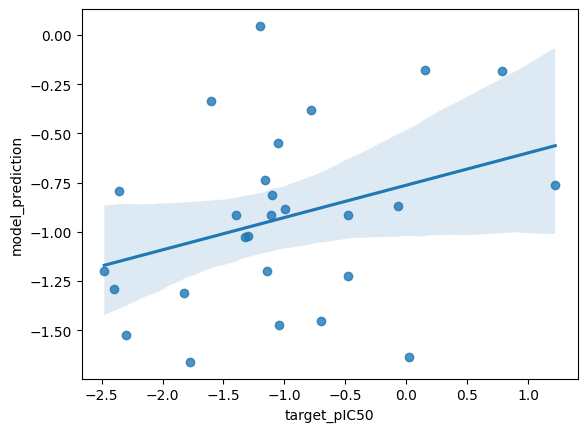

In [ ]:
pred_pred=LRpred.select(["model_prediction"]).toPandas()
actual=LRpred.select(["target_pIC50"]).toPandas()
sns.regplot(x=actual, y=pred_pred)

In [ ]:
def top_comp(df,n=2):
  ordered_df=df.orderBy("model_prediction", ascending=False)
  top_df=df1.select(["CID","smiles"]).join(ordered_df, on="CID", how="inner").orderBy("model_prediction", ascending=False)
  smiles_str=[i["Smiles"] for i in top_df.select("Smiles").collect()]
  mol_smiles=[Chem.MolFromSmiles(i) for i in smiles_str]
  return smiles_str, mol_smiles,top_df


+--------------------+
|    model_prediction|
+--------------------+
| 0.04612808378993266|
|-0.17892940058873655|
+--------------------+
only showing top 2 rows

None


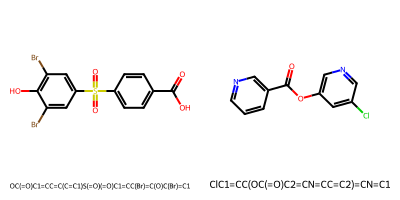

In [ ]:
n=2
smiles_str, mol_smiles,top_df=top_comp(LRpred,n)
print(top_df.select("model_prediction").show(n))
Draw.MolsToGridImage(mol_smiles[:n], legends=smiles_str[:n],useSVG=True,molsPerRow=2)

In [ ]:
# gradient boosting working:
gbt_reg=GBTRegressor(featuresCol="scaled_features_vector",labelCol="target_pIC50",predictionCol="model_prediction",maxIter=50, maxDepth=32,)
gbt_reg=res.fit(train)
gbt_pred=gbt_reg.transform(test)
# evaluation metrics as rmse: low rmse is good

evaluator = RegressionEvaluator(labelCol="target_pIC50",predictionCol="model_prediction", metricName="rmse")
rmse = evaluator.evaluate(gbt_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 0.87


In [ ]:
len(gbt_pred.columns)

33

<Axes: xlabel='target_pIC50', ylabel='model_prediction'>

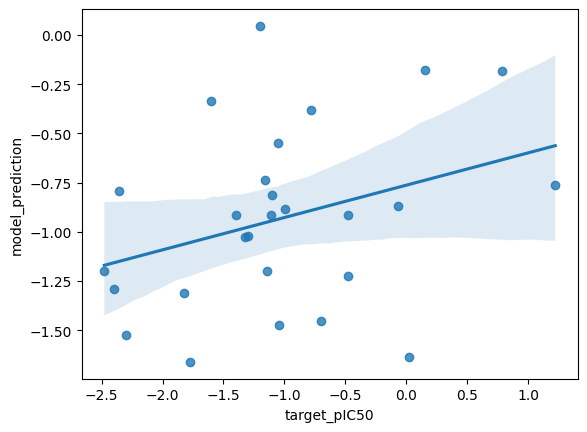

In [ ]:

pred_pred=gbt_pred.select(["model_prediction"]).toPandas()
actual=gbt_pred.select(["target_pIC50"]).toPandas()
sns.regplot(x=actual, y=pred_pred)

In [ ]:
gbt_pred.show(2)

+------+---------------+-----+----------+----------------+-----+----------+---------------+------------------+------------------+--------------+---------------+------------------------+---------------+----------------------+--------+-------------------+-------------------+-------------------+--------------+----------------------+-------------------+-------------------+--------------------+------------------+------------------------+--------------------+---------------------+----------------+------------+--------------------+----------------------+-------------------+
|   CID|MolecularWeight|XLogP| ExactMass|MonoisotopicMass| TPSA|Complexity|HBondDonorCount|HBondAcceptorCount|RotatableBondCount|HeavyAtomCount|AtomStereoCount|UndefinedAtomStereoCount|BondStereoCount|DefinedBondStereoCount|Volume3D|XStericQuadrupole3D|YStericQuadrupole3D|ZStericQuadrupole3D|FeatureCount3D|FeatureAcceptorCount3D|FeatureDonorCount3D|FeatureAnionCount3D|FeatureCationCount3D|FeatureRingCount3D|FeatureHydropho

+--------------------+
|    model_prediction|
+--------------------+
| 0.04612808378993266|
|-0.17892940058873655|
+--------------------+
only showing top 2 rows

None


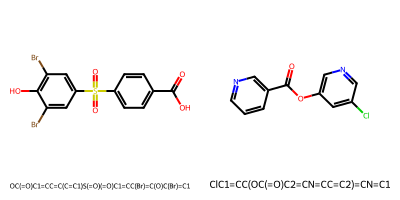

In [ ]:
# fetching top 5 most active compound

n=2
smiles_str, mol_smiles,top_df=top_comp(gbt_pred,n)
print(top_df.select("model_prediction").show(n))
Draw.MolsToGridImage(mol_smiles[:n], legends=smiles_str[:n],useSVG=True,molsPerRow=2)


+--------------------+
|    model_prediction|
+--------------------+
| 0.04612808378993266|
|-0.17892940058873655|
|-0.18121923943324922|
| -0.3346001231089672|
|-0.37959711590987577|
|  -0.546749289818588|
+--------------------+
only showing top 6 rows

None


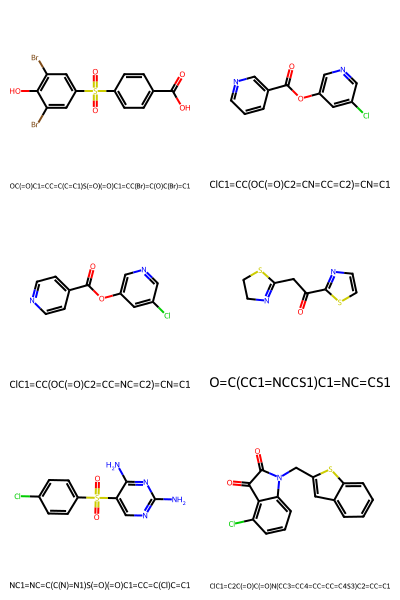

In [ ]:
smiles_str=[i["Smiles"] for i in top_df.select("Smiles").collect()]
mol_smiles=[Chem.MolFromSmiles(i) for i in smiles_str]
print(top_df.select("model_prediction").show(n))
n=6
Draw.MolsToGridImage(mol_smiles[:n], legends=smiles_str[:n],useSVG=True,molsPerRow=2)



# ETL-airflow:dags

In [ ]:
# notes:
"""
pyhton -m venv env1

docker ps
docker build -t tag_name .
docker run -it airflow_testing_tag_doc

# to run airflow: docker compose up/down, id and pass id airflow
docker container list
docker ps


# open url
https://airflow.apache.org/docs/apache-airflow/stable/howto/docker-compose/index.html

# run command or check with google:
curl.exe -LfO 'https://airflow.apache.org/docs/apache-airflow/3.1.0/docker-compose.yaml'


# run command; go to dir where  u have docker compose.yaml, it will run all db servers
docker compose run airflow-cli airflow config list



# make file .env and set AIRFLOW_UID=50000, AIRFLOW_PROJ_DIR=C:/Users/rajab/OneDrive/Desktop/etl-1

# config changes
1-docker-compose.yml me  airflow coinfig path update karo pahele opt wala hoga :
    AIRFLOW_CONFIG: 'C:\Users\rajab\OneDrive\Desktop\etl-1\config\airflow.cfg',
    AIRFLOW__CORE__LOAD_EXAMPLES: 'false'


    # image: ${AIRFLOW_IMAGE_NAME:-apache/airflow:3.1.0}
  build:
   context: .
   dockerfile: dockerfile



    # use docker compose up --build


2-congif.cfg -     ab config me dag path update karo: # go to congif.cfg and update dag folder
     dags_folder = C:\Users\rajab\OneDrive\Desktop\ETL\airflow\dags
     load_examples = False



# it will start docker airflow container at runtime: u will updateu ur code in local, ur code will be update in container directly that is runtime
docker compose up
docker compose down

http://localhost:8080

id pass is airflow by deafult
"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 782-783: truncated \UXXXXXXXX escape (ipython-input-3342295500.py, line 2)

In [ ]:
# docker command
restart airflow scxhedyluer image agtgter local changrs:
docker restart etl-1-airflow-scheduler-1


# run dag  baeed on id: airflow dags trigger apython_dag_id
airflow dags trigger apython_dag_id

# run task of dag specifuc fopr gesting
airflow tasks test apython_dag_id task_id_extract 2025-10-11



In [ ]:
# dockerfile

FROM apache/airflow:3.1.0

RUN pip install --no-cache-dir \
    pyspark \
    pandas \
    rdkit-pypi \
    kagglehub



In [ ]:

#.env

AIRFLOW_UID=50000
AIRFLOW__CORE__LOAD_EXAMPLES=False
AIRFLOW_PROJ_DIR=C:/Users/rajab/OneDrive/Desktop/etl-1



In [ ]:
#python dag.py
from airflow import DAG
from airflow.operators.empty import EmptyOperator as DummyOperator
from airflow.operators.python import PythonOperator
from datetime import datetime, timedelta



def_args={
    "owner": "airflow",
    "start_date": datetime(2025, 10, 8),
}

def extract_function():
    print("extracting")
    return "extracted"

def transform_function(ti):
    print("transformed_value")
    return "transformed_value"

def load_function(li):
    print("loaded_value")
    return "loaded_value"



with DAG(dag_id="python_dag_id",default_args=def_args,catchup=False,dagrun_timeout=timedelta(minutes=10),tags=["example"]) as dag:
    print("basic dag testing")
    start = DummyOperator(task_id="start")
    extract= PythonOperator(task_id="extract",python_callable=extract_function)
    transform= PythonOperator(task_id="transform_b",python_callable=transform_function, op_args=["transform"])
    load= PythonOperator(task_id="load",python_callable=load_function,op_kwargs={"li":"load"})
    end = DummyOperator(task_id="end")

    start >> extract >> transform >> load >> end

In [ ]:
# basic dag
from airflow import DAG
from airflow.operators.empty import EmptyOperator as DummyOperator
from datetime import datetime, timedelta



def_args={
    "owner": "airflow",
    "start_date": datetime(2023, 1, 1),
}


with DAG(
    dag_id="basics_dag_id",
    default_args=def_args,
    catchup=False,
    dagrun_timeout=timedelta(minutes=10),
    tags=["example"]
) as dag:
    print("basic dag testing")
    start = DummyOperator(task_id="start")
    extract= DummyOperator(task_id="extract")
    transform= DummyOperator(task_id="transform_b")
    load= DummyOperator(task_id="load")
    end = DummyOperator(task_id="end")

    start >> extract >> transform >> load >> end

In [ ]:
# libraries.py

from rdkit.Chem import Draw
from rdkit import Chem
import kagglehub
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.functions import udf
from pyspark.sql.types import *

from pyspark.ml.feature import MinMaxScaler, VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import *
from pyspark.ml.regression import *

In [ ]:
# functions.py

from libraries.py import *

def pyspark_init():
  spark = SparkSession.builder.appName("covid19MoleculePrediction").getOrCreate()
  return spark

def categorical_transformation(properties_df, data_df):

  """
  function to clean dat, removing null, buplicates, and considring only numerical features
  """

  # joining the properties table and dataframe table
  df1=data_df.join(properties_df, on='SMILES', how='inner')
  df1=df1.drop("Compound No.").drop("_c3")

  # pic50 is  present with string, need to cast it into double actual format
  df1=df1.withColumn("target_pIC50", df1["pIC50"].cast("double"))

  #droping null samples if either sample is absent
  df1=df1.dropna(how='any')

  # feqatures of non num type
  alpha_features=[i[0] for i in df1.dtypes if i[1]=="string"]
  df3=df1.drop(*alpha_features)

  # remove those features whose satnddard deviation of features is zero
  df3=df3.drop(*["Charge","IsotopeAtomCount","DefinedAtomStereoCount","UndefinedBondStereoCount","CovalentUnitCount"])
  return df3

def numerical_transformation(df):

  """
  output: scaled_features_vector column which congtins feature vector

  data will be encoded into vectors as well as minmax scaled fopr better optimization.
  If you had 100 separate numeric columns, Spark could not easily optimize the memory storage for all those zeros across 100 columns
  simultaneously; packing them into a single, compact vector column is much more efficient.
  """
  # if we want to do minmax scaling, then we need to convert those set of features in vectors,
  assembler = VectorAssembler(
      inputCols=["MolecularWeight","MonoisotopicMass","Complexity"],
      outputCol="features_vector"
  )
  df_vector = assembler.transform(df)
  scaler = MinMaxScaler(
    inputCol="features_vector",
    outputCol="scaled_features_vector"
  )

  # final vector matric where initial columns will be numerical features but last feature will be vector matrix, all feature embedded in one column as a vector
  scaler_model = scaler.fit(df_vector).transform(df_vector)
  return scaler_model

def chem_extract():
  """
  As data is structure so we will be use pysaprk dataframe, if data was semistructure of unstuctured like textx, json then we could use RDD(r- distributed dataset)
  """

  print("extractdata proces from kaggle store initiated")
  path=kagglehub.dataset_download("divyansh22/drug-discovery-data")
  path=kagglehub.dataset_download("divyansh22/drug-discovery-data")
  properties=r"/kaggle/input/drug-discovery-data/DDH Data with Properties.csv"
  data=r"/kaggle/input/drug-discovery-data/DDH Data.csv"

  spark=pyspark_init()
  properties_df = spark.read.csv(
    properties,
    header=True,       # Treat the first row as column names
    inferSchema=True )
  data_df = spark.read.csv(
    data,
    header=True,       # Treat the first row as column names
    inferSchema=True )

  print("extract proces completed")
  return properties_df, data_df

def chem_transform():

  print("transform pre/num-proces started")
  # process to extarct features
  properties_df, data_df=chem_extract()

  print("transform pre-proces started")
  # remove null, duplicates abd droping non num features
  df=categorical_transformation(properties_df, data_df)

  print("transform numerical-proces started")
  # converting features into vectors as sparka consider vector for better optimization
  final_dataframe=numerical_transformation(df)
  return final_dataframe

def chem_load():
  print("load process started")
  output_path=r"./final_chemical_comp.csv"
  chem_transform().write.option("header", True).csv(output_path)
  print("load proces completed")
  pass


In [ ]:
# dag with oythin operator

docker logs <container-name>

import logging
write functions in one file, all var which will be in capital letter in one file and call those func using exec in that dag

 The pickle module in Python converts objects into bytes (serialization/pickling) and bytes back into objects (deserialization/unpickling).


exec(constant_var)
exec(pyhton code)

exec("str data which could convert in python understandable")
Used at the top level: exec() creates or updates global variables.

Comparison
Correct:
from second_py_file import *
Incorrect:
from second_py_file.py import * (This will result in a syntax error)



from first_py_file import *
from second_py_file import * # it will import all data and fucntions in that file
#---------------------------------------

import pandas as pd

def extract_task(**kwargs):
    logging.info("Task started!")  # This shows up in Airflow UI logs


def extract():
  print("extract task")
  return "extract"
def transform(arg1):
  print("transform task")
  return "extract"
def load(arg2):
  print("load task")
  return "extract"

with DAG() as dag:
  start=DummyOperator(task_id="start")

  extract_task=PythonOperator(task_id="extract", python_callable=extract)
  transform_task=PythonOperator(task_id="transform", python_callable=transform,op_kwargs={arg1:"agr1"})
  load_task=PythonOperator(task_id="load", python_callable=load, op_kwargs={arg2:"agr2"})
  end=DummyOperator(task_id="end")

  start>>extract_task>>transform_task>>load_task

In [ ]:
def extract():
  print("extract task")
  data=[{"a":1,"b":1},{"a":11,"b":11}]
  df=pd.DataFrame([{"a":1,"b":1},{"a":11,"b":11}])
  return df
def transform(arg1,df):
  print("transform task")
  return df
def load(arg2,df):
  print("load task")
  return "extract"


def etl():
  df=extract()
  df1=transform(df)
  load(df1)

with DAG() as dag:
  start=DummyOperator(task_id="start")

  extract_task=PythonOperator(task_id="extract", python_callable=extract)
  transform_task=PythonOperator(task_id="transform", python_callable=transform,op_kwargs={arg1:"agr1"})
  load_task=PythonOperator(task_id="load", python_callable=load, op_kwargs={arg2:"agr2"})
  end=DummyOperator(task_id="end")

  start>>extract_task>>transform_task>>load_task

In [ ]:
# task group

from airflow.utils.task_group import  TaskGroup
with DAG() as dag:
  start=DummyOperator(task_id="start")
  mid=DummyOperator(task_id="mid")
  end=DummyOperator(task_id="end")
  with TaskGroup("a-z", tooltip="task group from ato z") as tg1:
    a=DummyOperator(task_id="a")
    b=DummyOperator(task_id="b")
    c=DummyOperator(task_id="c")
    d=DummyOperator(task_id="d")
    e=DummyOperator(task_id="e")
    a>>b
    c>>d
    .
start>>tg1>>mid>end


In [ ]:
# task group

from airflow.utils.task_group import  TaskGroup
with DAG() as dag:
  start=DummyOperator(task_id="start")
  mid=DummyOperator(task_id="mid")
  end=DummyOperator(task_id="end")
  with TaskGroup("a-z", tooltip="task group from ato z") as tg1:
    c=DummyOperator(task_id="c")
    e=DummyOperator(task_id="e")
    with TaskGroup("a-z", tooltip="task group from ato z") as tg2:
      a=DummyOperator(task_id="a")
      b=DummyOperator(task_id="b")
      d=DummyOperator(task_id="d")
      a>>b
      a>>d
    .
start>>tg1>>tg2>>mid>>end


# kafka


In [ ]:
rather than zooker we have kraft in updated version of kafka which manage all clumster , tomanage leaders and other partiotoion as backup


cluster measns group of servers(brokers), servers are running individual kafka process in some physicsal or virtual machine.
Cluster Management(broker, partions, topic, leader)
Cluster management means handling all the tasks and metadata required to keep the Kafka cluster healthy and operational.
Even if you have one cluster, you still need to:
Track which brokers are alive or dead
Assign leaders for each partition
Handle topic creation/deletion
Manage partition assignments and replication
Handle clients joining or leaving






In [ ]:
docker compose up/down
# run ur python producer file , while will connect local host with kafka container and send a msg and it will create a topic
docker exec -it kafka kafka-topics --list --bootstrap-server 192.168.1.75:9092
# to know abt topic and metadata
docker exec -it kafka kafka-topics  --bootstrap-server 192.168.1.75:9092 --describe --topic adarsh_orders
# to test consumer
docker exec -it kafka kafka-console-consumer  --bootstrap-server 192.168.1.75:9092 --topic adarsh_orders --from-beginning

In [ ]:
# docker-compose.yaml

version: '3.8'

services:
  kafka: # broker1/node/vm1_config1 def below, how vm should work and what are dependencies we need
    image: confluentinc/cp-kafka:7.8.3
    container_name: kafka # name of continer which we will se in docker.ps
    ports:
      - "9092:9092"

    environment:
      KAFKA_KRAFT_MODE: 'true'

      CLUSTER_ID: '1L6g7nGhU-eAKfL--X25wo'
      KAFKA_NODE_ID: 1 # broker/node ka id

      KAFKA_PROCESS_ROLES: broker,controller # this node/broker /vm will work as broker and controller(kraft, zooperkeeper wala kaam) to
      KAFKA_CONTROLLER_QUORUM_VOTERS: 1@kafka:9093 # node_id@contaiuner_id:active_port
      KAFKA_OFFSETS_TOPIC_REPLICATION_FACTOR: 1

      KAFKA_LISTENERS: PLAINTEXT://0.0.0.0:9092,CONTROLLER://0.0.0.0:9093
      KAFKA_ADVERTISED_LISTENERS: PLAINTEXT://localhost:9092
      KAFKA_CONTROLLER_LISTENER_NAMES: CONTROLLER

      KAFKA_LOG_DIRS: /tmp/kraft-combined-logs

    volumes:
      - kafka_kraft:/var/lib/kafka/data

volumes:
  kafka_kraft:


producer.py
# The word “bootstrap” refers to the concept of “starting up” or “initializing” a process.

# consumer.py
Yes—when "auto.offset.reset": "earliest" is set, the consumer will read starting from the earliest available offset, which is typically offset 0.